In [31]:
import pandas as pd

df = pd.read_csv('file_name.csv')
# df.head()
for index,row in df.iterrows():
    df.at[index,'present_hashtags'] = df.at[index,'present_hashtags'].replace('{','')
    df.at[index,'present_hashtags'] = df.at[index,'present_hashtags'].replace('}','')
    df.at[index,'present_hashtags'] = df.at[index,'present_hashtags'].lower()
    df.at[index,'present_mentions'] = df.at[index,'present_mentions'].replace('{','')
    df.at[index,'present_mentions'] = df.at[index,'present_mentions'].replace('}','')
    df.at[index,'present_mentions'] = df.at[index,'present_mentions'].lower()

df = df.drop_duplicates(subset='tweet_id', keep="first")
# df['present_hashtags'] = df['present_hashtags'].str.split(',')
# df = df.explode('present_hashtags')
# df['present_mentions'] = df['present_mentions'].str.split(',')
# df = df.explode('present_mentions')
df = df.drop_duplicates(subset='tweet_id', keep="first")

df['present_hashtags'] = df['present_hashtags'].str.split(',')
df = df.explode('present_hashtags')
df['present_mentions'] = df['present_mentions'].str.split(',')
df = df.explode('present_mentions')

df.to_csv ('test.csv', index = False, header=True)


In [32]:
import numpy as np

df_sentiment = pd.read_csv('test.csv')

df_sentiment['positive_sentiment'] = ''
df_sentiment['neutral_sentiment'] = ''
df_sentiment['negative_sentiment'] = ''

df_sentiment['compound'] = df_sentiment['compound'].astype(float)
df_sentiment.head()
for index,row in df_sentiment.iterrows():
    if(df_sentiment.at[index,'compound'] >= 0.05):
        df_sentiment.at[index,'positive_sentiment'] = '1'
    elif (df_sentiment.at[index,'compound'] > -0.05) and (df_sentiment.at[index,'compound'] < 0.05):
        df_sentiment.at[index,'neutral_sentiment'] = '0'
    else:
        df_sentiment.at[index,'negative_sentiment'] = '-1'
        

df_sentiment.to_csv ('Sentiment.csv', index = False, header=True)

In [33]:
df1 = pd.read_csv('Sentiment.csv')
df1 = df1['present_hashtags'].value_counts(ascending=False).to_frame()

df1.to_csv ('hashtag_count.csv', index = False, header=True)

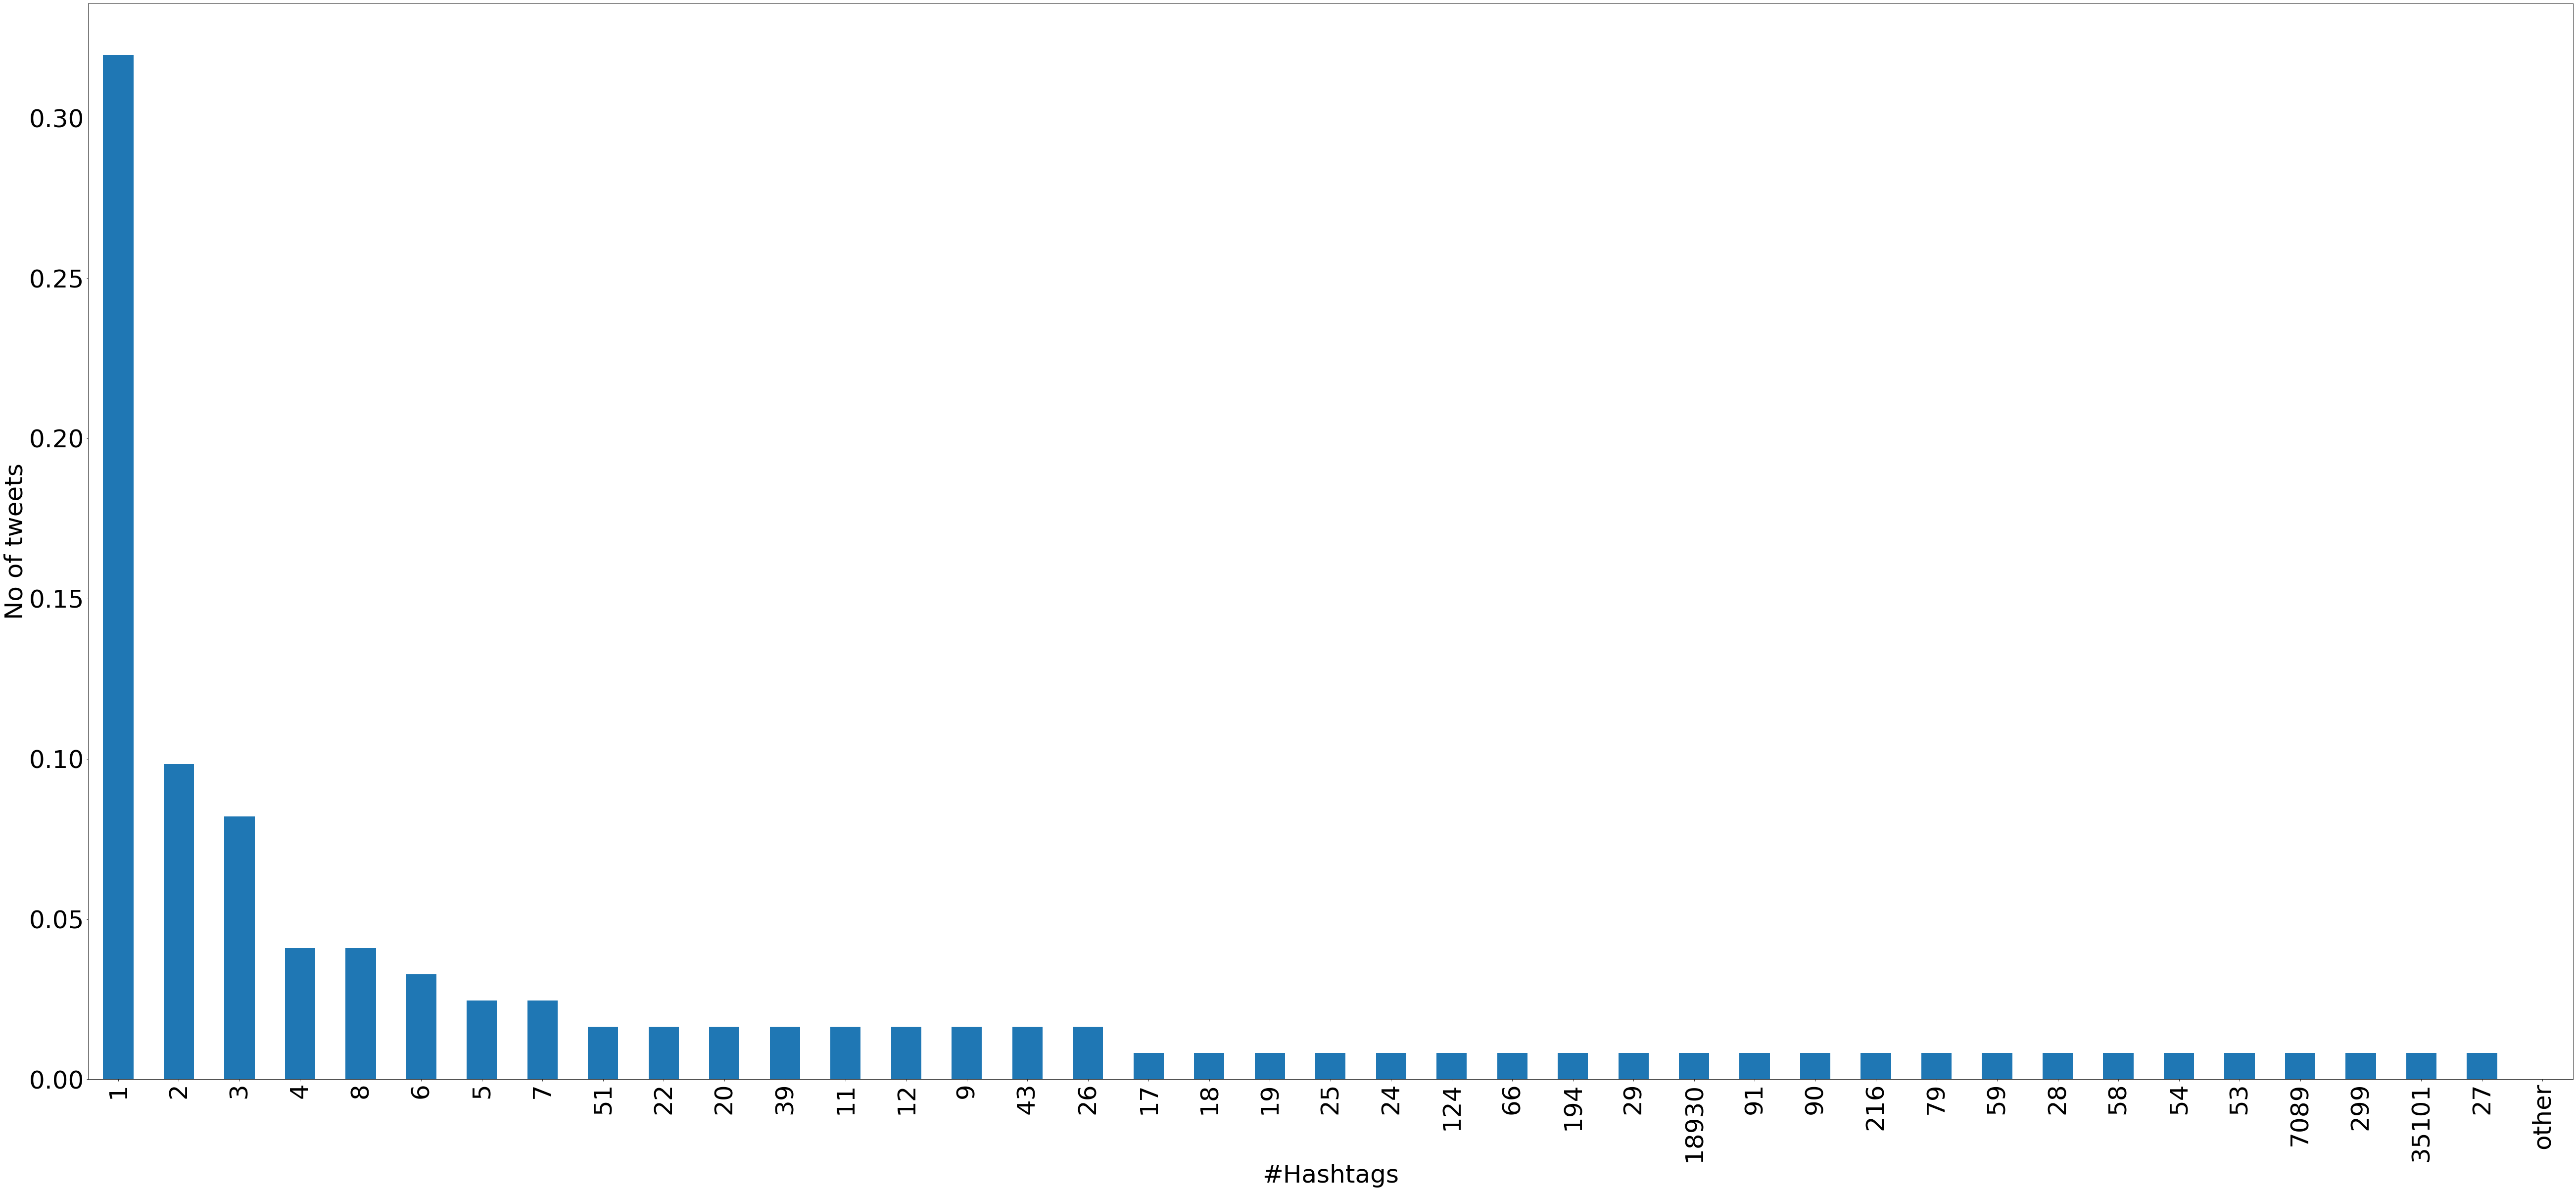

In [35]:
# import matplotlib.pyplot as plt

prob = df1['present_hashtags'].value_counts(ascending=False,normalize=True)
threshold = 0.0004
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob

prob.plot(kind='bar',figsize=(90,40),legend=None, fontsize=50)
plt.xlabel('#Hashtags', fontsize=50)
plt.ylabel('No of tweets', fontsize=50)
plt.xticks(rotation=90)

plt.show()

In [44]:
import matplotlib.pyplot as plt
from pandas import DataFrame

df1 = pd.read_csv('Sentiment.csv')
prob_normalize = df1['present_mentions'].value_counts(ascending=False,normalize=True).to_csv('mention_count_normalize.csv')

prob = df1['present_mentions'].value_counts(ascending=False,normalize=False).to_csv('mention_count.csv')


In [48]:
mention_count_normalize = pd.read_csv('mention_count_normalize.csv')
mention_count = pd.read_csv('mention_count.csv')

mentions_df = pd.merge(mention_count_normalize, mention_count, on='mention')
mentions_df.head()
mentions_df.to_csv ('mentions.csv', index = False, header=True)


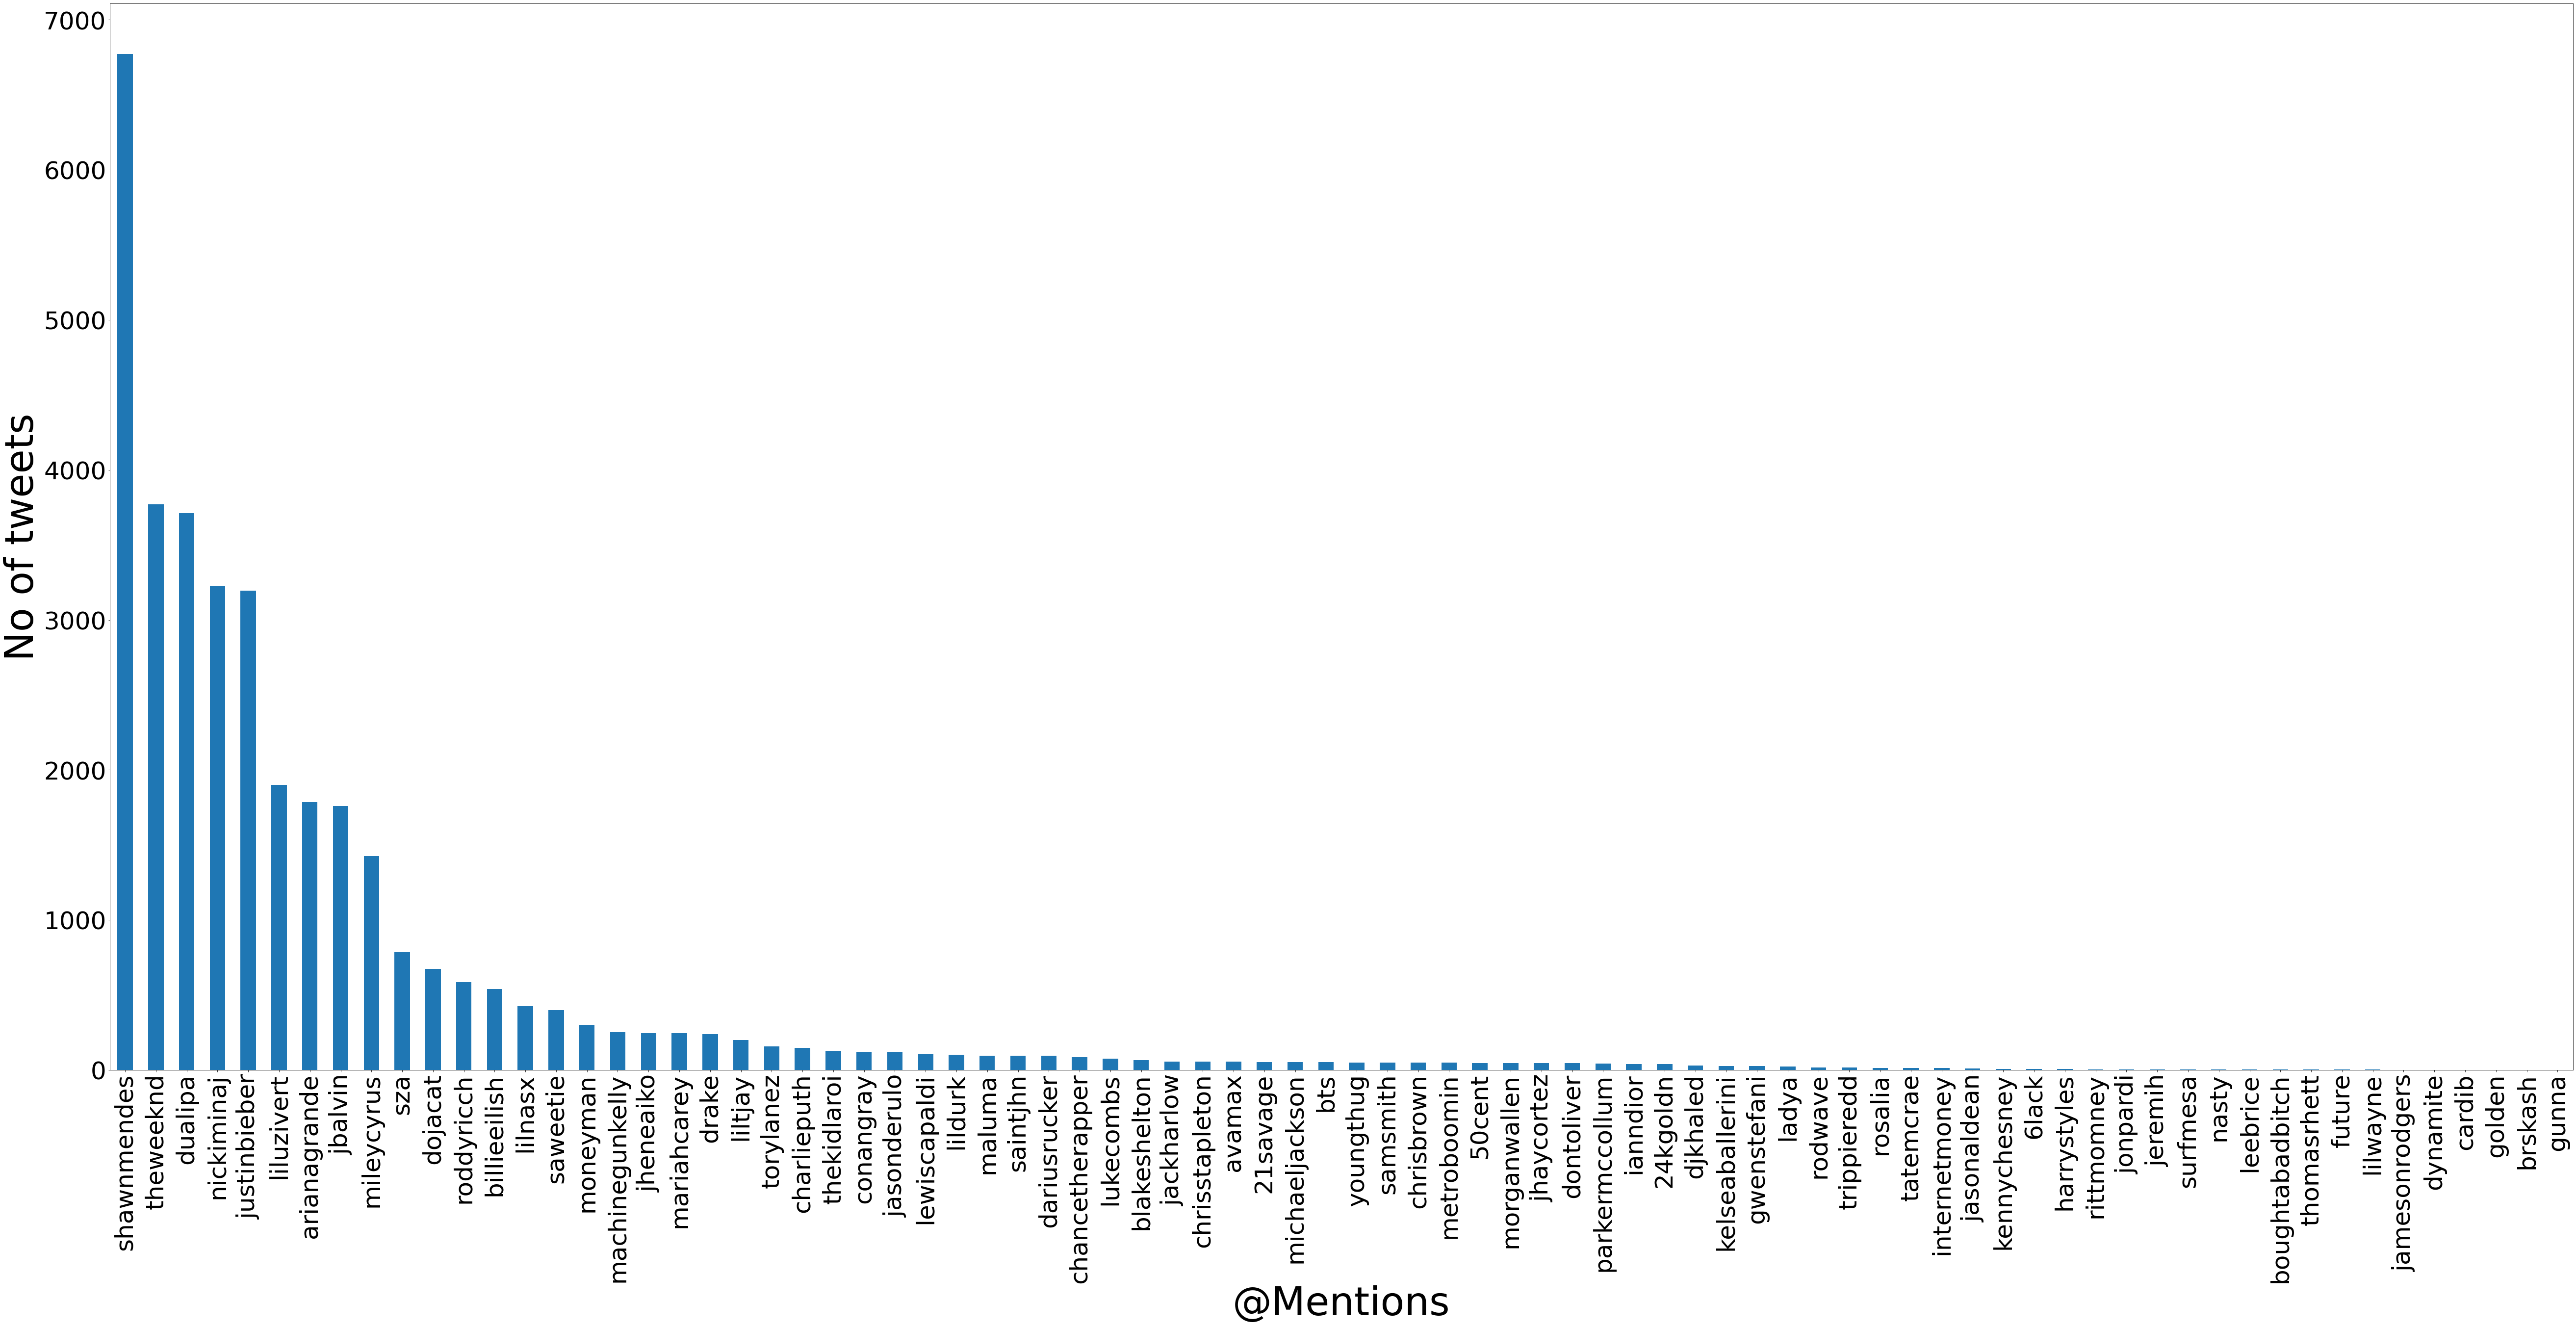

In [53]:
mention = pd.read_csv('mentions.csv')
mention.plot(x ='mention', y='count', kind = 'bar',legend=None,figsize=(90,40),fontsize=50)
plt.xlabel('@Mentions', fontsize=80)
plt.ylabel('No of tweets', fontsize=80)
plt.xticks(rotation=90)
plt.show()

In [54]:
import matplotlib.pyplot as plt
from pandas import DataFrame

df1 = pd.read_csv('Sentiment.csv')
pr_normalize = df1['present_hashtags'].value_counts(ascending=False,normalize=True).to_csv('hashtag_count_normalize.csv')

pr = df1['present_hashtags'].value_counts(ascending=False,normalize=False).to_csv('hashtag_count.csv')



In [56]:
hashtag_count_normalize = pd.read_csv('hashtag_count_normalize.csv')
hashtag_count = pd.read_csv('hashtag_count.csv')

hashtag_df = pd.merge(hashtag_count_normalize, hashtag_count, on='hashtag')
hashtag_df.head()
hashtag_df.to_csv ('hashtag.csv', index = False, header=True)

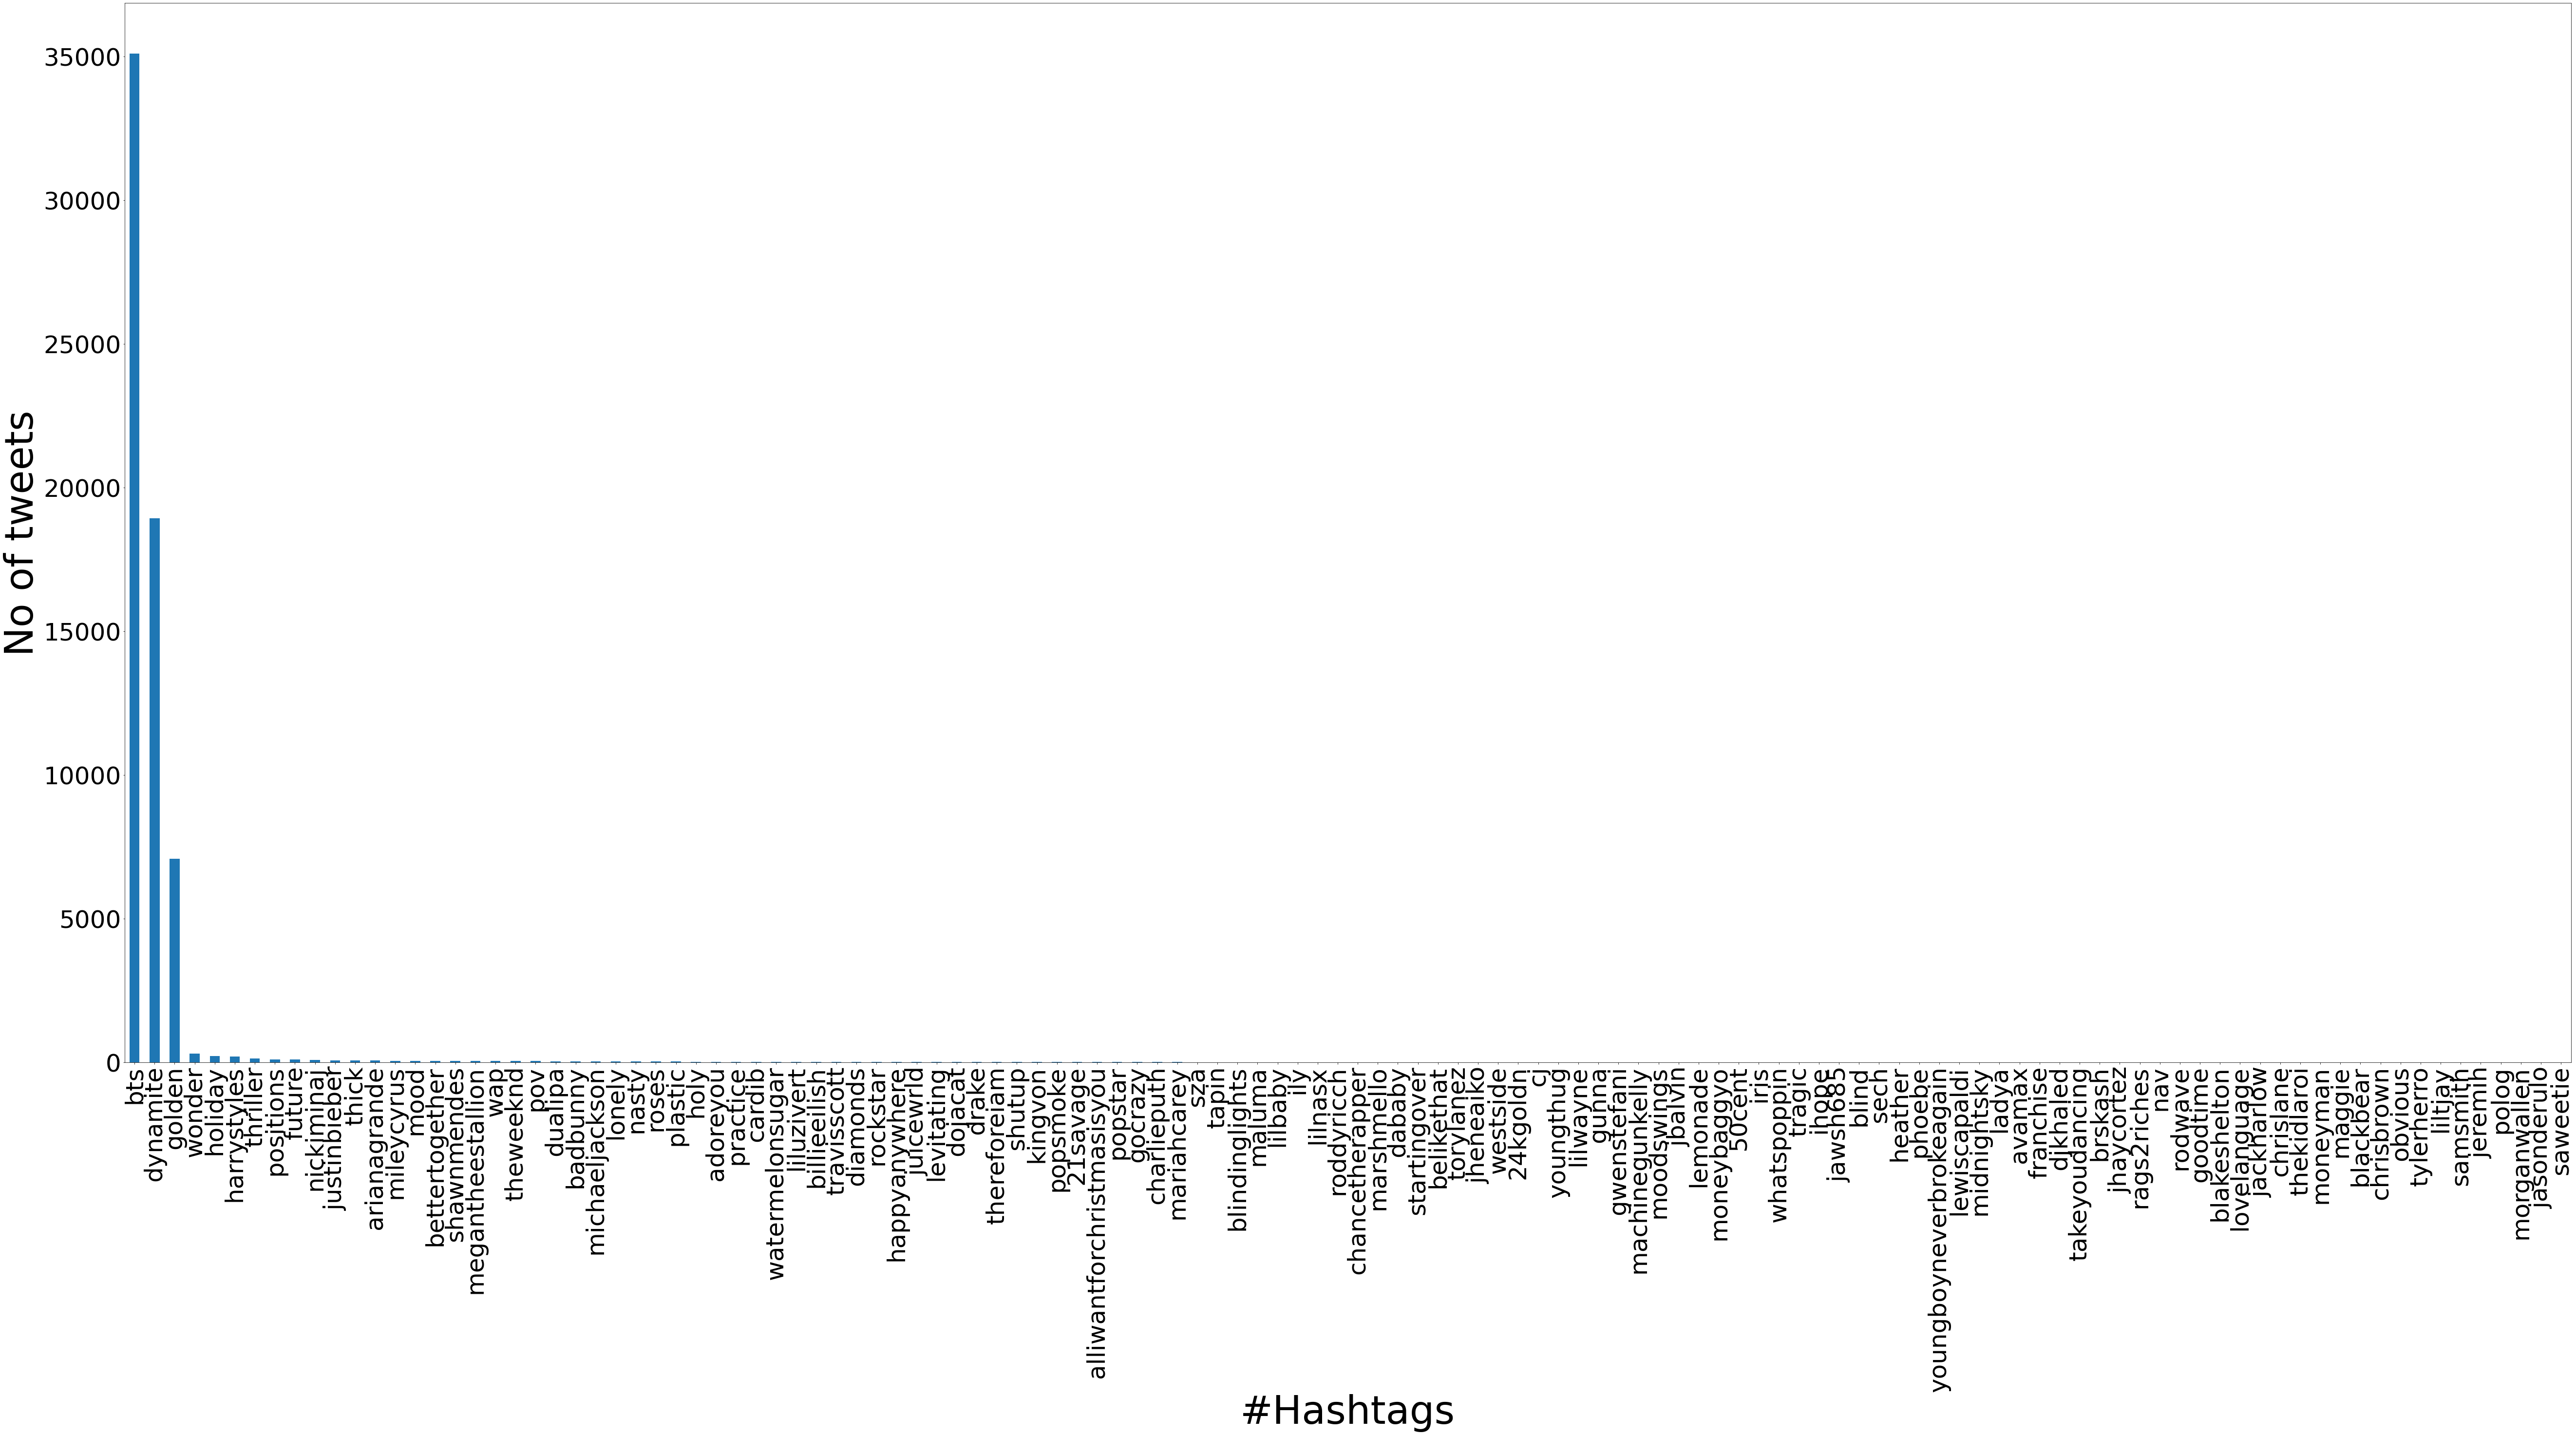

In [57]:
hashtag = pd.read_csv('hashtag.csv')
hashtag.plot(x ='hashtag', y='count', kind = 'bar',legend=None,figsize=(90,40),fontsize=50)
plt.xlabel('#Hashtags', fontsize=80)
plt.ylabel('No of tweets', fontsize=80)
plt.xticks(rotation=90)
plt.show()


In [326]:
df_sen = pd.read_csv('Sentiment.csv')
df_sen.head()

,created_at,tweet_id,tweet,today_date,present_hashtags,present_mentions,positive,negative,neutral,compound,sentiment
0,2020-11-20T17:45:55.000Z,1329843429992501251,@NICKIMINAJ ABOUT TO STREAM,2020-11-20,NaN,nickiminaj,0.000,0.000,1.000,0.0000,0
1,2020-11-20T17:59:58.000Z,1329846965769809926,hello dear @NICKIMINAJ,2020-11-20,NaN,nickiminaj,0.722,0.000,0.278,0.3818,1
2,2020-11-20T17:28:13.000Z,1329838975645790211,RT @bts_bighit: #BTS 'Life Goes On' (ARMY ver....,2020-11-20,bts,NaN,0.000,0.000,1.000,0.0000,0
3,2020-11-20T17:28:25.000Z,1329839025948127232,Freaky Girls @theestallion @sza Issa big vibe 🔥,2020-11-20,NaN,sza,0.000,0.385,0.615,-0.3612,-1
4,2020-11-20T17:28:37.000Z,1329839076300623874,"When you feeling like a diva, who do you call?...",2020-11-20,nickiminaj,NaN,0.286,0.000,0.714,0.4588,1


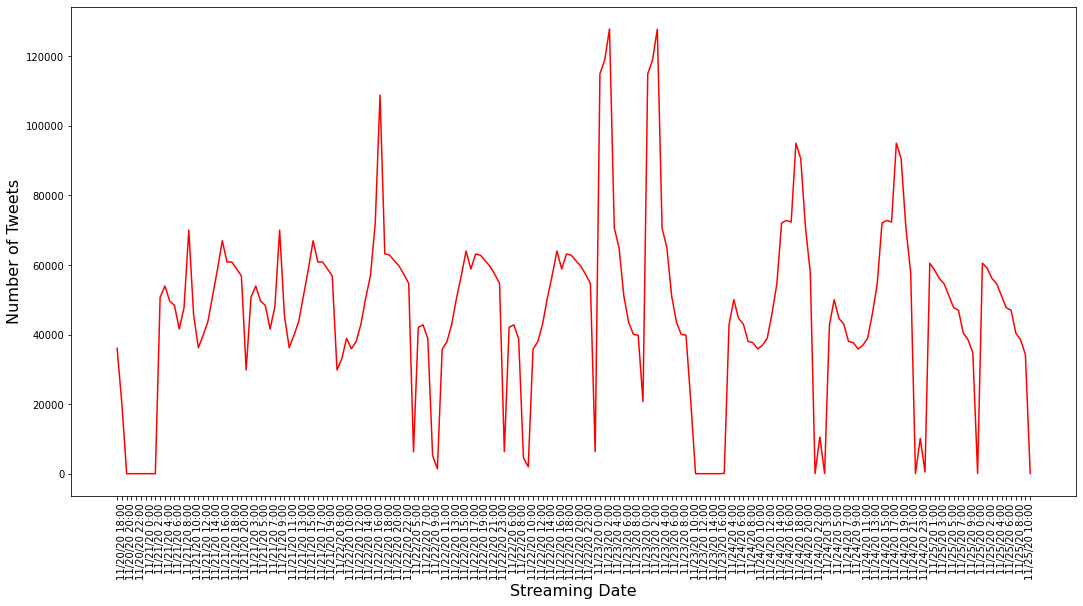

In [29]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn

df = pd.read_csv('timeseries.csv', names=['created_at'])
df['date'] = pd.to_datetime(df['created_at'])
ag = df.groupby(pd.Grouper(key = 'date', freq = '1h')).count()
df.head()

dates = df_timeseries['date']

spacing = 2
fig, ax = plt.subplots()
ax.plot(df_timeseries['cnt'],'r-')
ax.set_xticks(np.arange(len(dates)))
ax.set_xticklabels(dates)
plt.xticks(rotation=90)
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)
fig.set_size_inches(18, 9)
plt.xlabel('Streaming Date', fontsize=16)
plt.ylabel('Number of Tweets', fontsize=16)
plt.show()